# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#url for weather map api
weather_map_url = f'https://api.openweathermap.org/data/2.5/weather?&units=imperial&appid={weather_api_key}'
#create lists/columns
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
record = 1
record_set = 1

#print statement for data retrieval
print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    try:
        #pull info of each city from api into json
        response = requests.get(f'{weather_map_url}&q={city}').json()
        
        #append to each list except for city
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        #if count record hits 50 then move to next set and reset count to 1, else keep counting to 50 cities
        if record > 49:
            record = 1
            record_set += 1
            city_name.append(city)
        else:
            record += 1
            city_name.append(city)
        print(f'Processing Record {record} of Set {record_set} | {city}')
    except:
        print('City not found. Skipping...')
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')

Beginning Data Retrieval
-----------------------------
Processing Record 2 of Set 1 | hosanagara
Processing Record 3 of Set 1 | albany
City not found. Skipping...
Processing Record 4 of Set 1 | rikitea
City not found. Skipping...
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | collie
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | westport
Processing Record 10 of Set 1 | xingyi
Processing Record 11 of Set 1 | yaan
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | kalmunai
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | sarangani
Processing Record 16 of Set 1 | buraydah
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | bathsheba
Processing Record 21 of Set 1 | chuy
Processing Record 22 of Set 1 | faya
Processing Record 23 of Set 1 | punta arenas
Proc

Processing Record 40 of Set 4 | arraial do cabo
City not found. Skipping...
City not found. Skipping...
Processing Record 41 of Set 4 | gardez
City not found. Skipping...
Processing Record 42 of Set 4 | palora
Processing Record 43 of Set 4 | aksarka
Processing Record 44 of Set 4 | millau
Processing Record 45 of Set 4 | bilibino
Processing Record 46 of Set 4 | hami
Processing Record 47 of Set 4 | pevek
Processing Record 48 of Set 4 | waipawa
Processing Record 49 of Set 4 | bull savanna
Processing Record 50 of Set 4 | gotsu
Processing Record 1 of Set 5 | tefe
Processing Record 2 of Set 5 | russell
Processing Record 3 of Set 5 | adrar
Processing Record 4 of Set 5 | kamaishi
Processing Record 5 of Set 5 | vestmannaeyjar
Processing Record 6 of Set 5 | te anau
Processing Record 7 of Set 5 | qui nhon
Processing Record 8 of Set 5 | ovalle
Processing Record 9 of Set 5 | manggar
City not found. Skipping...
Processing Record 10 of Set 5 | foam lake
Processing Record 11 of Set 5 | sao filipe
Proce

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a dataframe
weather_df = pd.DataFrame({"City": city_name,"Lat": lat,"Lng":lng, 
                           "Max Temp":max_temp, "Humidity":humidity, "Cloudiness":cloudiness, 
                           "Wind Speed":wind_speed,"Country":country, "Date":date})
weather_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hosanagara,13.9167,75.0667,60.24,40,1,3.96,IN,1673472117
1,albany,42.6001,-73.9662,30.94,65,100,3.20,US,1673472108
2,rikitea,-23.1203,-134.9692,78.48,77,20,17.72,PF,1673472118
3,port alfred,-33.5906,26.8910,73.18,95,52,1.01,ZA,1673472118
4,collie,-33.3667,116.1500,53.06,95,2,3.89,AU,1673472119
...,...,...,...,...,...,...,...,...,...
287,george,-33.9630,22.4617,71.15,94,100,3.44,ZA,1673472280
288,santa marinella,42.0345,11.8536,49.71,78,88,7.16,IT,1673472281
289,half moon bay,37.4636,-122.4286,57.29,92,100,23.02,US,1673472228
290,lashio,22.9333,97.7500,47.23,88,0,1.05,MM,1673472283


In [9]:
weather_df.head()
weather_df.to_csv("../output_data/weather_df.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
humidity_over_100 = weather_df[(weather_df["Humidity"]>100)].index


In [13]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100 


Int64Index([], dtype='int64')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(humidity_over_100,inplace = False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hosanagara,13.9167,75.0667,60.24,40,1,3.96,IN,1673472117
1,albany,42.6001,-73.9662,30.94,65,100,3.20,US,1673472108
2,rikitea,-23.1203,-134.9692,78.48,77,20,17.72,PF,1673472118
3,port alfred,-33.5906,26.8910,73.18,95,52,1.01,ZA,1673472118
4,collie,-33.3667,116.1500,53.06,95,2,3.89,AU,1673472119


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

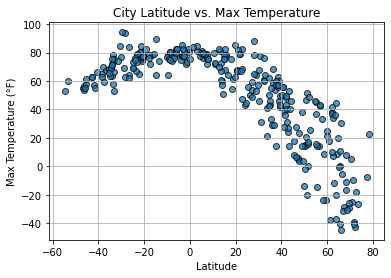

In [21]:
plt.ioff
fig1 = plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],
            edgecolor = "black",linewidth = 1, alpha = 0.75,marker = "o")
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/fig1.png')
plt.show()

## Latitude vs. Humidity Plot

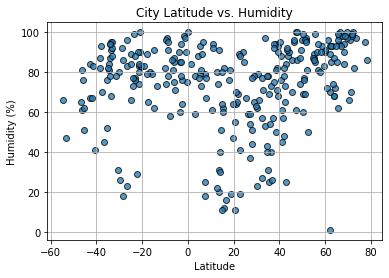

In [22]:
fig2 = plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],
            edgecolor = "black",linewidth = 1, alpha = 0.75,marker = "o")
plt.title(f"City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

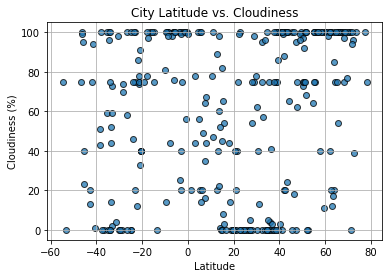

In [23]:
fig3 = plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"],
            edgecolor = "black",linewidth = 1, alpha = 0.75,marker = "o")
plt.title(f"City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/fig3.png')
plt.show()

## Latitude vs. Wind Speed Plot

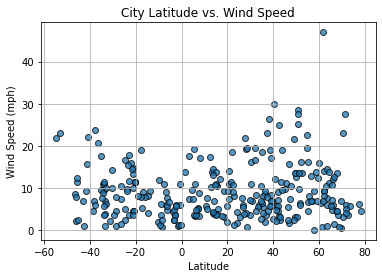

In [24]:
fig4 = plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],
            edgecolor = "black",linewidth = 1, alpha = 0.75,marker = "o")
plt.title(f"City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/fig4.png')
plt.show()

## Linear Regression

In [36]:
northen_hemispere = clean_city_data.loc[clean_city_data['Lat'] > 0]
southern_hemisphere = clean_city_data.loc[clean_city_data['Lat'] < 0]
                    
def plot_lin_regression(x_values,y_values,xtitle,ytitle,x_coord, y_coord):
    #lin regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_value = x_values * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue**2}")
    print(line_equation)

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_value, 'r-')
    plt.annotate(line_equation, (x_coord, y_coord), fontsize = 20, color = "red")
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.grid(True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7226582313597245
y = -1.45x + 95.06


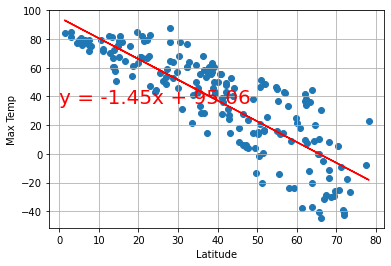

In [37]:
x_values = northen_hemispere['Lat']
y_values = northen_hemispere['Max Temp']

plot_lin_regression(x_values, y_values, 'Latitude', 'Max Temp', 0,35)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.43210272222584
y = 0.42x + 82.27


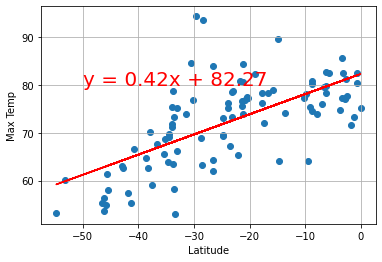

In [38]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']

plot_lin_regression(x_values, y_values, 'Latitude', 'Max Temp', -50, 80)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18727607463842874
y = 0.5x + 53.09


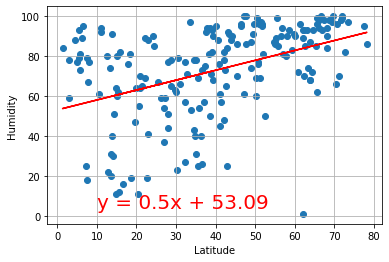

In [39]:
x_values = northen_hemispere['Lat']
y_values = northen_hemispere['Humidity']

plot_lin_regression(x_values, y_values, 'Latitude', 'Humidity', 10, 4)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07849639886965366
y = 0.34x + 85.38


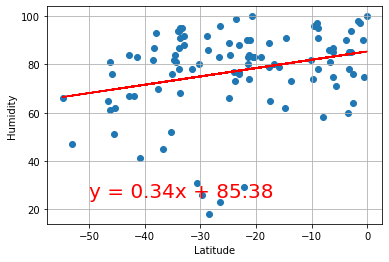

In [40]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

plot_lin_regression(x_values, y_values, 'Latitude', 'Humidity', -50, 25)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16781255660833708
y = 0.82x + 26.2


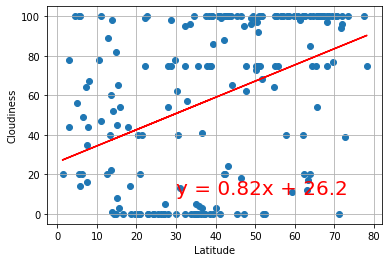

In [41]:
x_values = northen_hemispere['Lat']
y_values = northen_hemispere['Cloudiness']

plot_lin_regression(x_values, y_values, 'Latitude', 'Cloudiness', 30, 10)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11294989951736957
y = 0.9x + 83.56


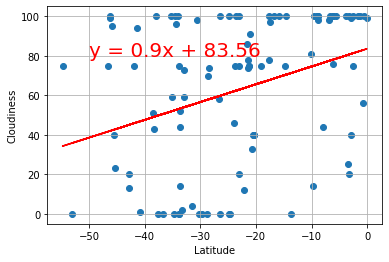

In [42]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']

plot_lin_regression(x_values, y_values, 'Latitude', 'Cloudiness', -50, 80)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002381957791874589
y = 0.02x + 8.7


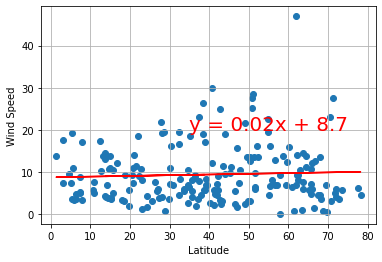

In [45]:
x_values = northen_hemispere['Lat']
y_values = northen_hemispere['Wind Speed']

plot_lin_regression(x_values, y_values, 'Latitude', 'Wind Speed', 35, 20)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.13882569838862663
y = -0.14x + 4.78


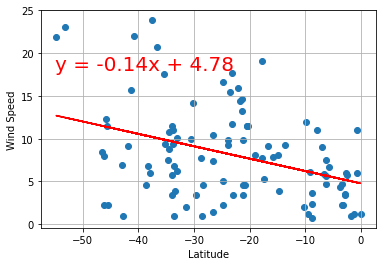

In [46]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
plot_lin_regression(x_values, y_values, 'Latitude', 'Wind Speed', -55, 18)
plt.show()